# Fetch the data

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
unoccupied_file_paths = [
    '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/emptyscenarios.xlsx'
]

In [3]:
# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file paths and append each DataFrame to the list
for file in unoccupied_file_paths:
    df = pd.read_excel(file, header=None, index_col=False)
    dfs.append(df)

# Concatenate all the DataFrames in the list
unoccupied_combined_df = pd.concat(dfs, ignore_index=True)
unoccupied_combined_df

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,64,32768,1,1,512,0,1953125,12,0,3312,...,4,3,2,-1,-2,1,3,-1,-2,-2
1,64,32768,1,1,512,0,1953125,12,0,3317,...,-12,-9,-5,-5,-5,-3,-1,-1,0,-1
2,64,32768,1,1,512,0,1953125,12,0,3317,...,-1,0,-4,-5,-6,-6,-8,-9,-8,-6
3,64,32768,1,1,512,0,1953125,12,0,3315,...,-47,-46,-51,-48,-52,-47,-49,-51,-52,-55
4,64,32768,1,1,512,0,1953125,12,0,3312,...,-33,-33,-29,-26,-27,-28,-30,-31,-32,-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,64,32768,1,1,512,0,1953125,12,0,3472,...,-7,-5,-6,0,-4,-1,-1,-3,-6,-5
2001,64,32768,1,1,512,0,1953125,12,0,3472,...,-11,-10,-10,-9,-10,-9,-5,-3,-2,1
2002,64,32768,1,1,512,0,1953125,12,0,3472,...,-16,-13,-11,-13,-13,-9,-13,-15,-11,-11
2003,64,32768,1,1,512,0,1953125,12,0,3472,...,12,14,10,11,13,11,12,8,9,14


In [4]:
len(unoccupied_combined_df)

2005

In [5]:
# Get the shape of the DataFrame
shape = unoccupied_combined_df.shape

# Number of rows
num_rows = shape[0]

# Number of columns
num_columns = shape[1]

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 2005
Number of columns: 16384


In [6]:
# Select from the 17th column to the end
adc_data_selected_columns = unoccupied_combined_df.iloc[:, 16:] 
adc_data_selected_columns

,16,17,18,19,20,21,22,23,24,25,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,-9,-9,-11,-13,3,0,2,2,1,-2,...,4,3,2,-1,-2,1,3,-1,-2,-2
1,-3,1,3,4,-3,-2,-1,-1,2,0,...,-12,-9,-5,-5,-5,-3,-1,-1,0,-1
2,-6,-4,-2,22,19,18,15,18,20,22,...,-1,0,-4,-5,-6,-6,-8,-9,-8,-6
3,-46,-42,-40,-41,-5,-2,2,1,0,-1,...,-47,-46,-51,-48,-52,-47,-49,-51,-52,-55
4,-30,-34,-33,-37,-16,-9,-13,-11,-13,-13,...,-33,-33,-29,-26,-27,-28,-30,-31,-32,-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,2,2,-2,-1,-1,-1,2,4,6,1,...,-7,-5,-6,0,-4,-1,-1,-3,-6,-5
2001,-10,-9,-9,-7,-7,-2,-5,-5,-4,4,...,-11,-10,-10,-9,-10,-9,-5,-3,-2,1
2002,-7,-3,-3,-1,1,-2,-1,0,-1,-5,...,-16,-13,-11,-13,-13,-9,-13,-15,-11,-11
2003,9,10,10,12,-10,-6,-1,-4,-5,-9,...,12,14,10,11,13,11,12,8,9,14


# Convert the ADC Data to FFT

filtered column are [30.070106304985337, 30.189432123655916, 30.30875794232649, 30.42808376099707, 30.547409579667644, 30.66673539833822, 30.7860612170088, 30.905387035679375, 31.024712854349954, 31.14403867302053, 31.263364491691103, 31.38269031036168, 31.502016129032256, 31.621341947702838, 31.740667766373413, 31.85999358504399, 31.979319403714566, 32.098645222385144, 32.21797104105572, 32.337296859726294, 32.456622678396876, 32.57594849706745, 32.695274315738025, 32.8146001344086, 32.93392595307918, 33.05325177174976, 33.17257759042033, 33.291903409090914, 33.41122922776148, 33.53055504643206, 33.64988086510264, 33.76920668377322, 33.888532502443795, 34.00785832111437, 34.12718413978495, 34.24650995845552, 34.3658357771261, 34.485161595796676, 34.60448741446725, 34.72381323313783, 34.84313905180841, 34.96246487047899, 35.08179068914956, 35.20111650782014, 35.32044232649071, 35.43976814516129, 35.55909396383187, 35.678419782502445, 35.79774560117303, 35.917071419843595, 36.0363972385

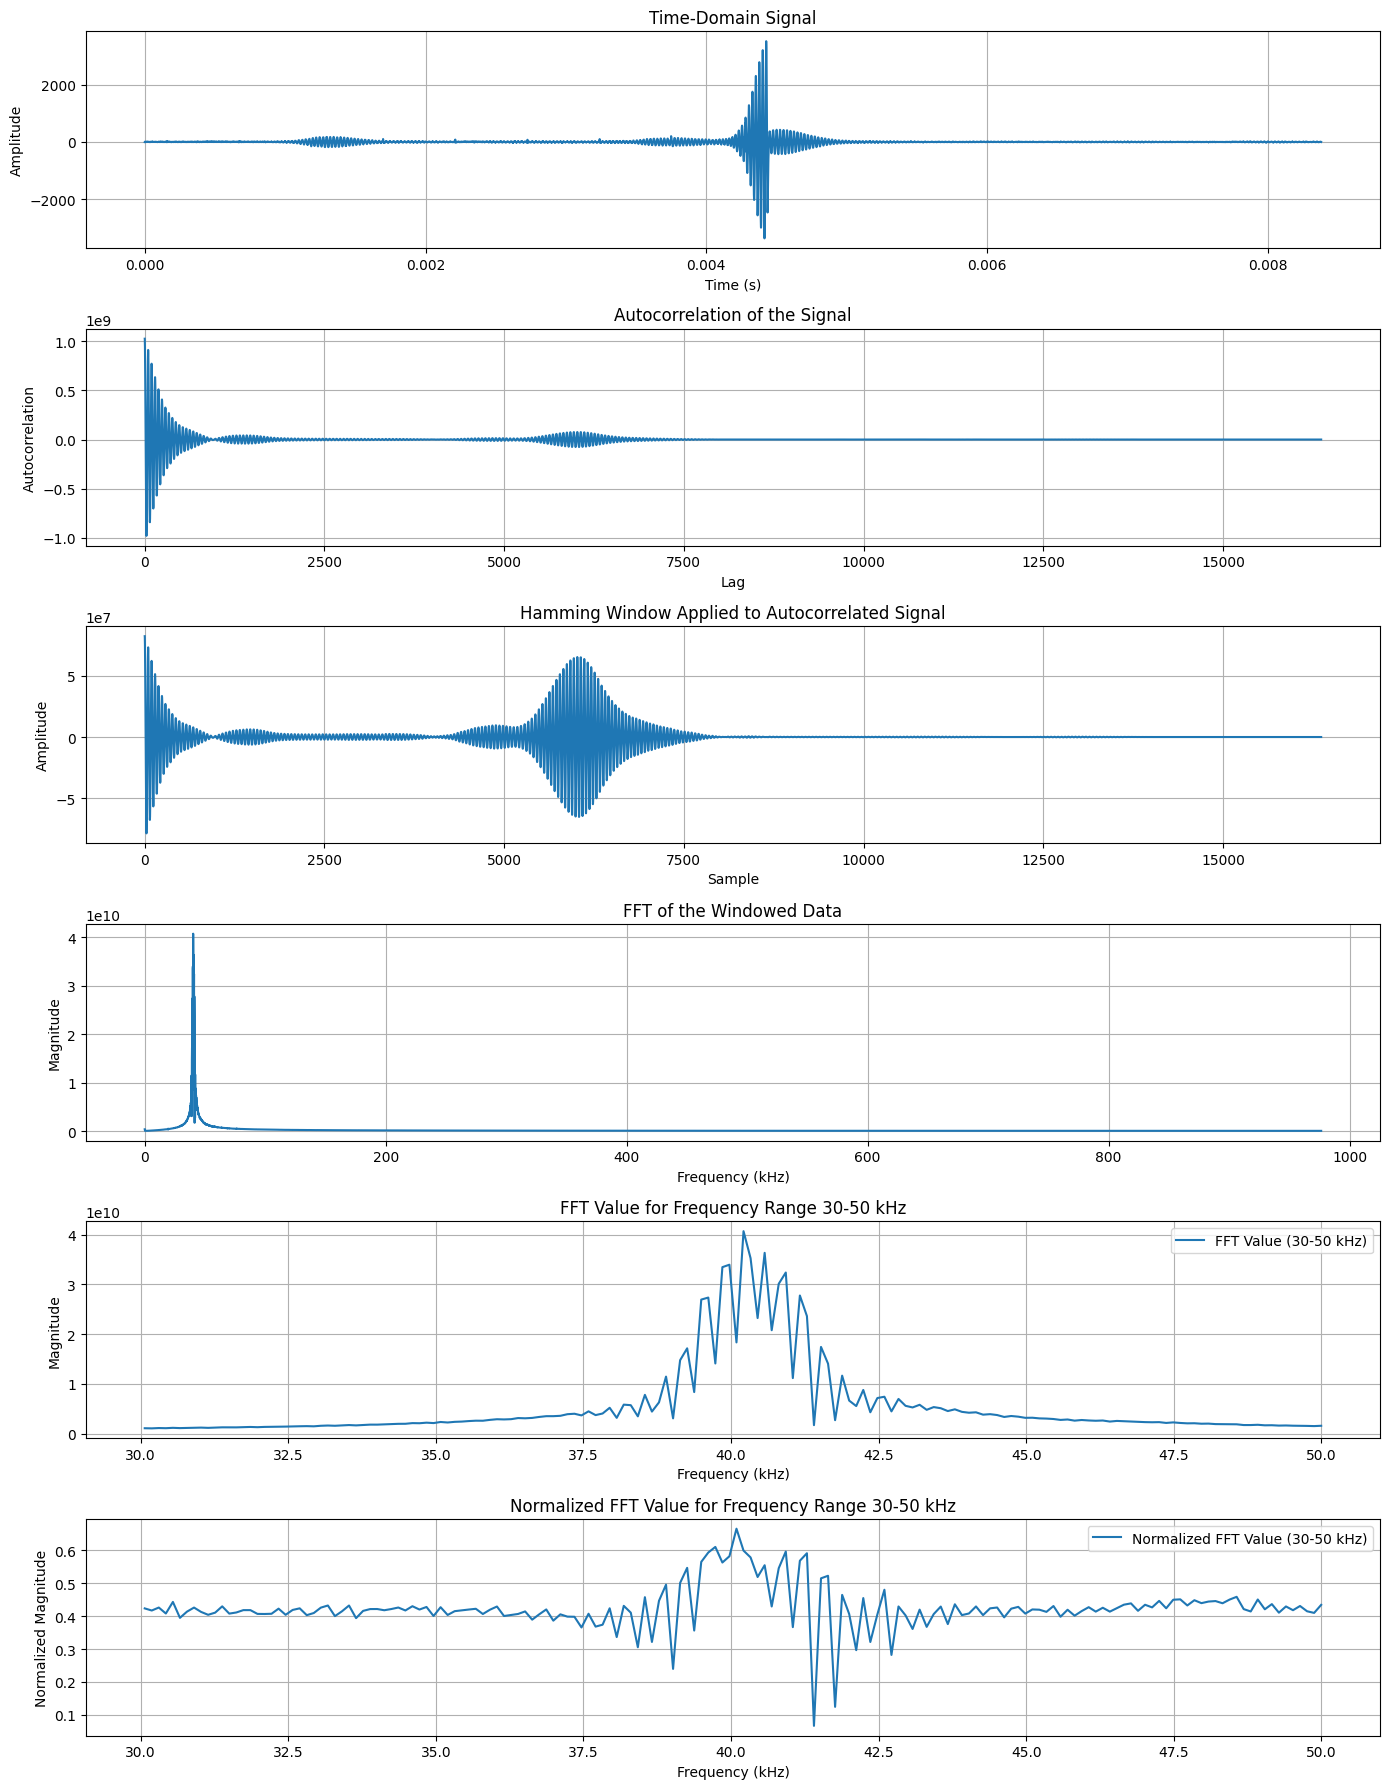

In [7]:

# # Assuming `adc_data_selected_columns` is your DataFrame
# adc_array = adc_data_selected_columns.to_numpy()

# # Define the sampling frequency
# sampling_rate = 1953125  # Use the actual sampling rate

# # Initialize lists to store the results
# fft_values_list = []
# frequency_list = []

# # Perform FFT for each row
# for row in range(adc_array.shape[0]):
#     # Compute the FFT
#     fft_result = np.fft.fft(adc_array[row, :])
    
#     # Frequency bins
#     freq = np.fft.fftfreq(len(fft_result), d=1/sampling_rate)
    
#     # Extract positive frequencies and corresponding FFT values
#     positive_freqs = freq[:len(freq) // 2] / 1000  # Convert to kHz
#     positive_fft_values = np.abs(fft_result[:len(freq) // 2])
    
#     # Append the results to the lists
#     if row == 0:
#         frequency_list = positive_freqs  # Store frequency values only once
#     fft_values_list.append(positive_fft_values)

# # Convert lists to numpy arrays
# fft_values = np.array(fft_values_list)

# # Create a DataFrame
# fft_df = pd.DataFrame(fft_values, columns=frequency_list)

# # Define the specific frequency range in kHz
# range_min, range_max = 30, 50

# # Filter data for the specified range
# filtered_columns = [col for col in fft_df.columns if range_min <= col <= range_max]
# print("filtered column are", filtered_columns)
# filtered_data = fft_df[filtered_columns]
# print(filtered_data)
# # Plot the results
# plt.figure(figsize=(14, 14))

# # Plot the time-domain signal
# plt.subplot(4, 1, 1)
# plt.plot(np.arange(adc_array.shape[1]) / sampling_rate, adc_array[0, :])  # Plotting the first row as an example
# plt.title('Time-Domain Signal')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.grid(True)

# # Plot the FFT of the time-domain signal (both positive and negative frequencies)
# plt.subplot(4, 1, 2)
# plt.plot(np.fft.fftfreq(len(adc_array[0, :]), d=1/sampling_rate), np.abs(np.fft.fft(adc_array[0, :])))
# plt.title('FFT of Time-Domain Signal')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.grid(True)

# # Plot the positive part of the FFT
# plt.subplot(4, 1, 3)
# plt.plot(frequency_list, fft_df.iloc[0, :])
# plt.title('Positive Part (Magnitude) of FFT')
# plt.xlabel('Frequency (kHz)')
# plt.ylabel('Magnitude')
# plt.grid(True)

# # Plot the FFT values in the 30-50 kHz range
# plt.subplot(4, 1, 4)
# plt.plot(filtered_data.columns, filtered_data.iloc[0, :], label='FFT Value')  # Plotting the first row's FFT values
# plt.title('FFT Value for Frequency Range 30-50 kHz')
# plt.xlabel('Frequency (kHz)')
# plt.ylabel('Magnitude')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming adc_data_selected_columns_for_person is your DataFrame
adc_array = adc_data_selected_columns.to_numpy()

# Define the sampling frequency
sampling_rate = 1953125  # Use the actual sampling rate

# Autocorrelation function
def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

# Apply Hamming window function
def apply_hamming_window(data):
    window = np.hamming(len(data))
    return data * window

# Initialize lists to store the results
fft_values_list = []
frequency_list = []

# Perform processing for each row
for row in adc_array:
    # Step 1: Compute the autocorrelation
    autocorr_result = autocorrelation(row)
    
    # Step 2: Apply the Hamming window
    windowed_data = apply_hamming_window(autocorr_result)
    
    # Step 3: Compute the FFT
    fft_result = np.fft.fft(windowed_data)
    
    # Frequency bins
    freq = np.fft.fftfreq(len(fft_result), d=1/sampling_rate)
    
    # Extract positive frequencies and corresponding FFT values
    positive_freqs = freq[:len(freq) // 2] / 1000  # Convert to kHz
    positive_fft_values = np.abs(fft_result[:len(freq) // 2])
    
    # Append the results to the lists
    if len(frequency_list) == 0:
        frequency_list = positive_freqs  # Store frequency values only once
    fft_values_list.append(positive_fft_values)

# Convert lists to numpy arrays
fft_values = np.array(fft_values_list)

# Create a DataFrame
fft_df = pd.DataFrame(fft_values, columns=frequency_list)

# Define the specific frequency range in kHz
range_min, range_max = 30, 50

# Filter data for the specified range
filtered_columns = [col for col in fft_df.columns if range_min <= col <= range_max]
filtered_data = fft_df[filtered_columns]


# Normalize the filtered data
normalized_data = (filtered_data - filtered_data.min()) / (filtered_data.max() - filtered_data.min())

print("filtered column are", filtered_columns)
filtered_normalized_data = fft_df[filtered_columns]
print(filtered_normalized_data)

# Plot the results
plt.figure(figsize=(14, 18))

# Plot the time-domain signal
plt.subplot(6, 1, 1)
plt.plot(np.arange(adc_array.shape[1]) / sampling_rate, adc_array[0, :])  # Plotting the first row as an example
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the autocorrelation of the time-domain signal
plt.subplot(6, 1, 2)
plt.plot(autocorrelation(adc_array[0, :]))
plt.title('Autocorrelation of the Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

# Plot the Hamming window applied to the autocorrelated signal
plt.subplot(6, 1, 3)
plt.plot(apply_hamming_window(autocorrelation(adc_array[0, :])))
plt.title('Hamming Window Applied to Autocorrelated Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT of the windowed data
plt.subplot(6, 1, 4)
plt.plot(frequency_list, fft_df.iloc[0, :])
plt.title('FFT of the Windowed Data')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot the FFT values in the 30-50 kHz range
plt.subplot(6, 1, 5)
plt.plot(filtered_data.columns, filtered_data.iloc[0, :], label='FFT Value (30-50 kHz)')
plt.title('FFT Value for Frequency Range 30-50 kHz')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Plot the normalized FFT values in the 30-50 kHz range
plt.subplot(6, 1, 6)
plt.plot(normalized_data.columns, normalized_data.iloc[0, :], label='Normalized FFT Value (30-50 kHz)')
plt.title('Normalized FFT Value for Frequency Range 30-50 kHz')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()







In [8]:
# Add a new column to the fft_magnitude DataFrame for the binary label
# Set the value to 1 for presence of an infant with a carriage
filtered_data['unoccupied'] = 0  # 1 for presence, 0 for absence (if you have such data)

# Display the first few rows to verify the new column
filtered_data.head()

/var/folders/d3/b6_bs4f14wlctn7b0tv8d4tw0000gn/T/ipykernel_4014/3056426614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['unoccupied'] = 0  # 1 for presence, 0 for absence (if you have such data)


,30.070106,30.189432,30.308758,30.428084,30.54741,30.666735,30.786061,30.905387,31.024713,31.144039,...,49.042911,49.162237,49.281563,49.400889,49.520215,49.639541,49.758866,49.878192,49.997518,unoccupied
0,1.085742e+09,1.059656e+09,1.123131e+09,1.094027e+09,1.165667e+09,1.112585e+09,1.152326e+09,1.192523e+09,1.211584e+09,1.161403e+09,...,1.672210e+09,1.689242e+09,1.617187e+09,1.641891e+09,1.594574e+09,1.581733e+09,1.553858e+09,1.516597e+09,1.580264e+09,0
1,1.140310e+09,1.141361e+09,1.169881e+09,1.166919e+09,1.209590e+09,1.184145e+09,1.236349e+09,1.242125e+09,1.274318e+09,1.211354e+09,...,1.780267e+09,1.788051e+09,1.754038e+09,1.719611e+09,1.684098e+09,1.659533e+09,1.647512e+09,1.619400e+09,1.628537e+09,0
2,1.057580e+09,1.104007e+09,1.121488e+09,1.109807e+09,1.140913e+09,1.151525e+09,1.157640e+09,1.205009e+09,1.214163e+09,1.152302e+09,...,1.752692e+09,1.647060e+09,1.709624e+09,1.614683e+09,1.631603e+09,1.639459e+09,1.537982e+09,1.549962e+09,1.552664e+09,0
3,1.007413e+09,1.033386e+09,1.062218e+09,1.057874e+09,1.070676e+09,1.105656e+09,1.070938e+09,1.163177e+09,1.133174e+09,1.134726e+09,...,1.600368e+09,1.622341e+09,1.617624e+09,1.544029e+09,1.535899e+09,1.516995e+09,1.481200e+09,1.453846e+09,1.528152e+09,0
4,1.100108e+09,1.085294e+09,1.168394e+09,1.073461e+09,1.168907e+09,1.142054e+09,1.189817e+09,1.212795e+09,1.210721e+09,1.216799e+09,...,1.685083e+09,1.750102e+09,1.627524e+09,1.665024e+09,1.622652e+09,1.636490e+09,1.544552e+09,1.566884e+09,1.559768e+09,0


# Numpy Array format Saving for minimizing the memory

In [9]:
numpy_array = filtered_data.to_numpy()
# Save the array to a file
np.save('/Users/shivakumarbiru/Desktop/individual_project/rfc/numpy/unoccupied', numpy_array)